# CENSUS INCOME

Problem Statement:

 The prediction task is to determine whether a person makes over $50K a year. In this code block solution, we will be using a dataset gotten from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).



Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Now, we understand our problem statement and we have a clear understanding of what we want to achive. 
We will now use machine learning to build a predictive model.
We will begin by importing the necessary libraries for our code to work.
Easy yh? Let's dig in. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

The libraries above are the basic and important libraries in machine learning. The next step is to import our dataset from git and load it.Our dataset is a csv file so we have to use the syntax for loading a csv file .

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

# Explanatory Data Analysis(EDA).

Great, now let's take a look at the data set we've imported and study  it carefully. Studying the dataset is an important part of data analysis as it helps in making decsions that will affect the model.

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32560, 15)

Our dataset consists of 32560 rows and 15 columns.

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In cell 7, we checked for the data types for each column and it turns out that we have some columns with the object data type and some columns with the integer data type. Working with object data type can be hard sometimes and its best to change the necessary ones to integers for better accuracy using a tranformer.We'll come to this.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Next we have to clean the data. A dataset usually cotains some empty spaces or irrelevant information that ends up affecting the model if not taken care of. We would be on the look out for null values, Nan or missing values.

In [9]:
df.isnull().all()

Age               False
Workclass         False
Fnlwgt            False
Education         False
Education_num     False
Marital_status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country    False
Income            False
dtype: bool

In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

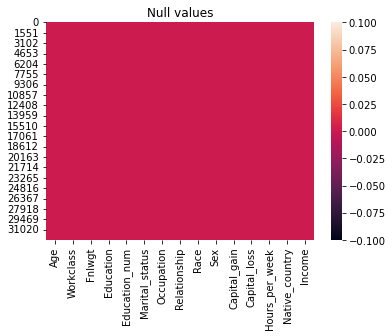

In [11]:
#a heatmap for null values 
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

As seen from the above block of code, we have zero null values which means our dataset is clean. We however have come missing values in the following columns;
Workclass 
 Occupation and 
 Native_country

In [12]:
#replacing missing values 
df['Workclass']=df['Workclass'].replace('?','Private')
df['Occupation']=df['Occupation'].replace('?','Prof-specialty')
df['Native_country']=df['Native_country'].replace('?','United-sates')

In [13]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [14]:
df.corr().all()

Age               True
Fnlwgt            True
Education_num     True
Capital_gain      True
Capital_loss      True
Hours_per_week    True
dtype: bool

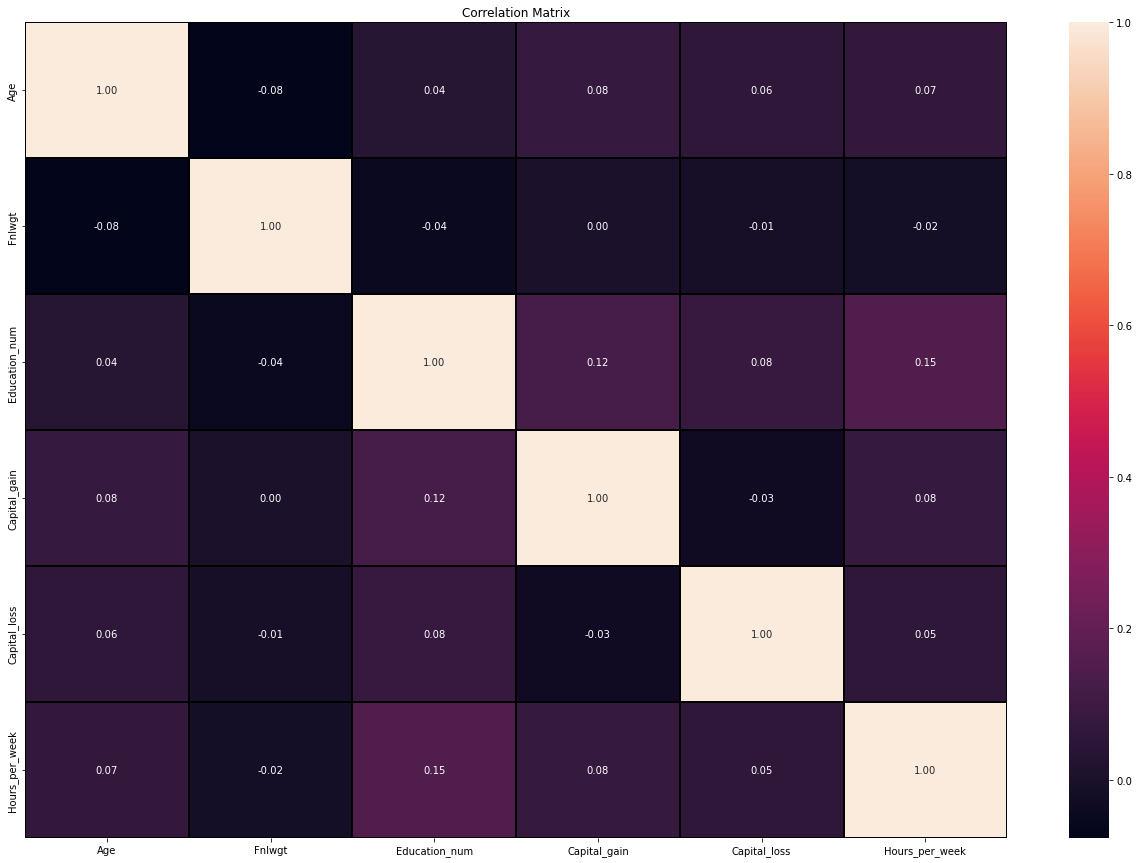

In [15]:
#A correlation heatmap
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(), annot=True,fmt="0.2f",linewidth=0.1,linecolor="black")
plt.title("Correlation Matrix")
plt.show()

Now, we're tring to see the correlation between the columns. From here we can rank the columns on their level of importance.From the above we can see that all the columns are positively correlated.
Let's properly analyse the correlations.

Education has a weak positive linear relationship with the target variable, its correlation coeffict is 0.34.

Hours per week has a weak uphill positive linear relationship, its correlation coefficient is 0.23.

Age has a weak positive linear relationship,its correlation coefficient is 0.23.

Logically, a person with more education would be more likely to earn more than a person with with little to no education. Just as a person that works several hours per week woud earn more than a person that works just a couple of hours per week. The same goes for age, an older person with more wisdom and experience would likely earn more than a young person just entering the field. 

In [16]:
#transforming data 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Workclass']=le.fit_transform(df['Workclass'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Race']=le.fit_transform(df['Race'])
df['Sex']=le.fit_transform(df['Sex'])
df['Income']=le.fit_transform(df['Income'])

Here, we have tranformed all the object type columns to integers , so if we check fo their data types, we'll see that they're all integers.

In [17]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

They've all been transformed into integers. Now this is getting interesting. Next thing on the list is to check for the skewness of the columns and the outliers in the dataset.

In [18]:
#checking skewness
import warnings 
warnings.filterwarnings('ignore')

df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

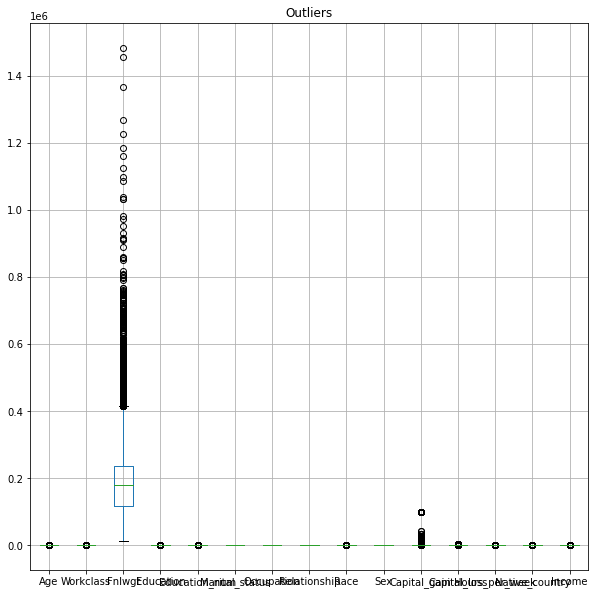

In [19]:
#checking for outliers
df.iloc[:,0:30].boxplot(figsize=[10,20])
plt.subplots_adjust(bottom=0.5)
plt.title("Outliers")
plt.show()

In [20]:
#dealing with outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


Now , we have dealt with all the outliers in the dataset. We will move on to data visualisation.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Marital_status'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>],
       [<AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>],
       [<AxesSubplot:title={'center':'Hours_per_week'}>,
        <AxesSubplot:title={'center':'Native_country'}>,
        <AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>]],
      dtype=object)

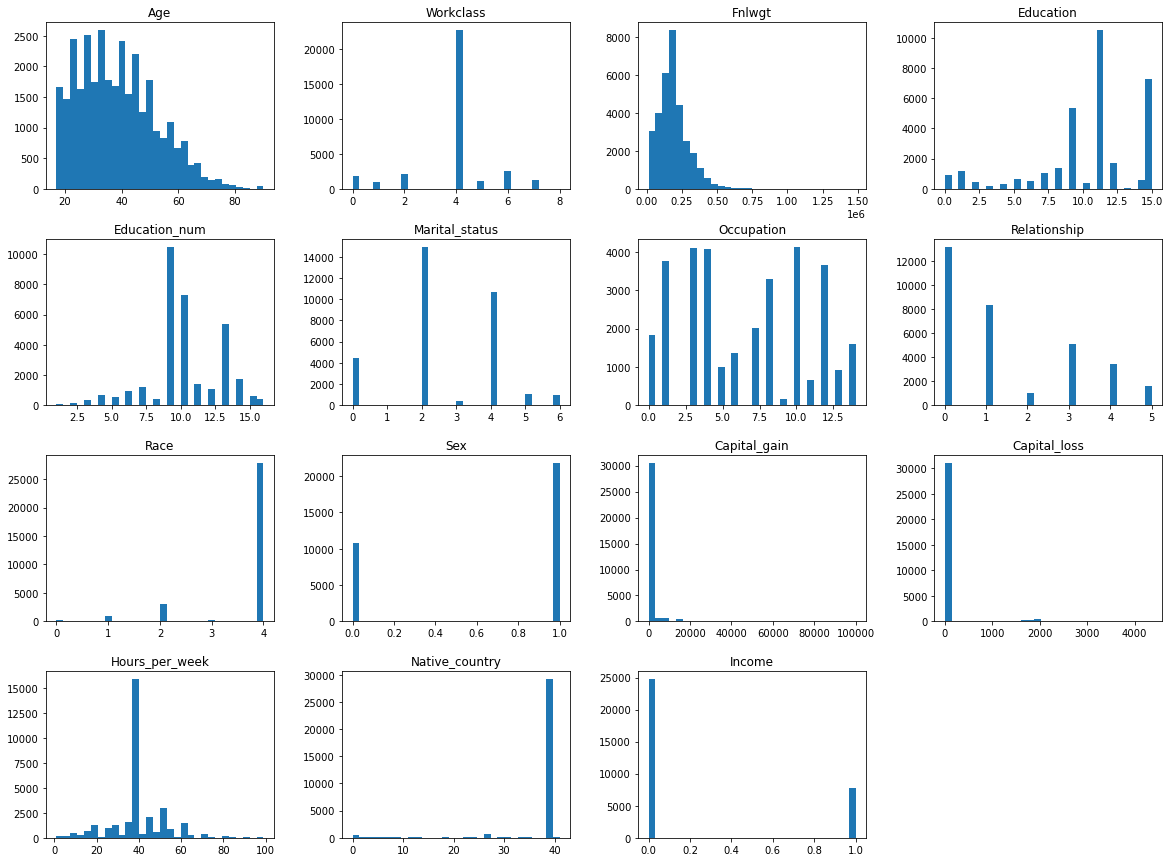

In [21]:
#using a histogram to analyze the data 
df.hist(grid=False,figsize=(20,15),bins=30)

The histogram has shown an aggregate detail of the dataset. Next, we'll use a countplot for each to better our understanding.

<AxesSubplot:xlabel='Age', ylabel='count'>

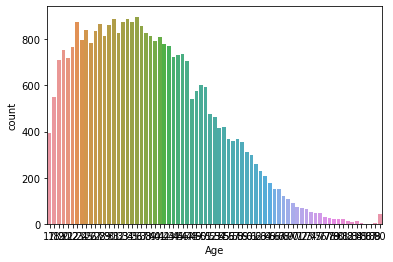

In [22]:
sns.countplot(df.Age)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

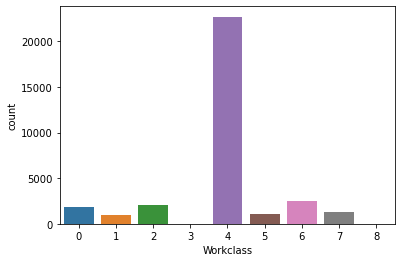

In [23]:
sns.countplot(df.Workclass)

<AxesSubplot:xlabel='Fnlwgt', ylabel='count'>

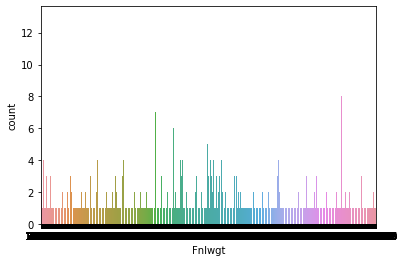

In [24]:
sns.countplot(df.Fnlwgt)

<AxesSubplot:xlabel='Education', ylabel='count'>

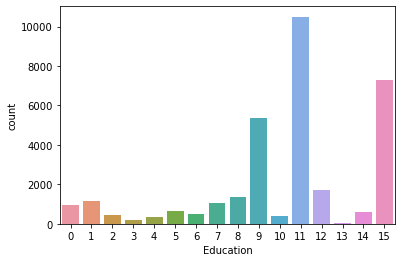

In [25]:
sns.countplot(df.Education)

<AxesSubplot:xlabel='Education_num', ylabel='count'>

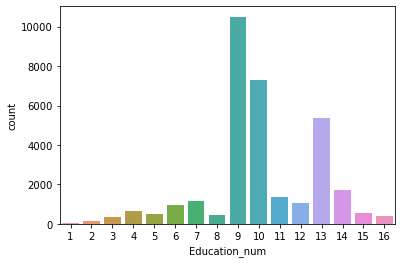

In [26]:
sns.countplot(df.Education_num)

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

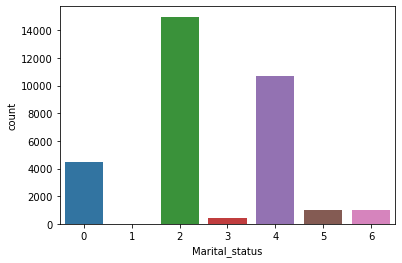

In [27]:
sns.countplot(df.Marital_status)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

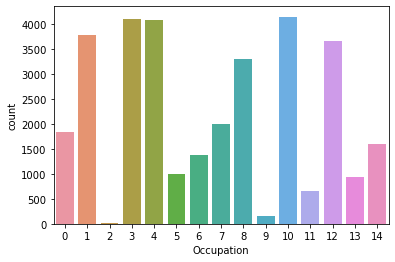

In [28]:
sns.countplot(df.Occupation)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

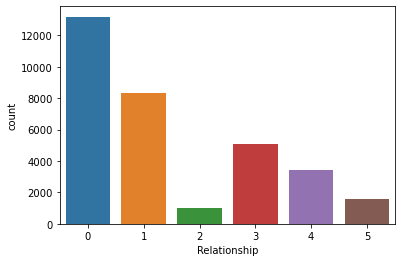

In [29]:
sns.countplot(df.Relationship)

<AxesSubplot:xlabel='Race', ylabel='count'>

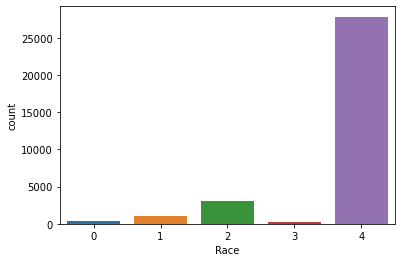

In [30]:
sns.countplot(df.Race)

<AxesSubplot:xlabel='Sex', ylabel='count'>

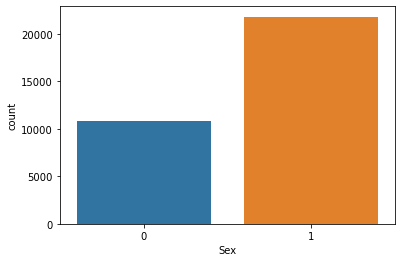

In [31]:
sns.countplot(df.Sex)

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Workclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Fnlwgt', ylabel='Age'>,
        <AxesSubplot:xlabel='Education', ylabel='Age'>,
        <AxesSubplot:xlabel='Education_num', ylabel='Age'>,
        <AxesSubplot:xlabel='Marital_status', ylabel='Age'>,
        <AxesSubplot:xlabel='Occupation', ylabel='Age'>,
        <AxesSubplot:xlabel='Relationship', ylabel='Age'>,
        <AxesSubplot:xlabel='Race', ylabel='Age'>,
        <AxesSubplot:xlabel='Sex', ylabel='Age'>,
        <AxesSubplot:xlabel='Capital_gain', ylabel='Age'>,
        <AxesSubplot:xlabel='Capital_loss', ylabel='Age'>,
        <AxesSubplot:xlabel='Hours_per_week', ylabel='Age'>,
        <AxesSubplot:xlabel='Native_country', ylabel='Age'>,
        <AxesSubplot:xlabel='Income', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Workclass'>,
        <AxesSubplot:xlabel='Workclass', ylabel='Workclass'>,
        <AxesSubplot:xlabel='Fnlwgt

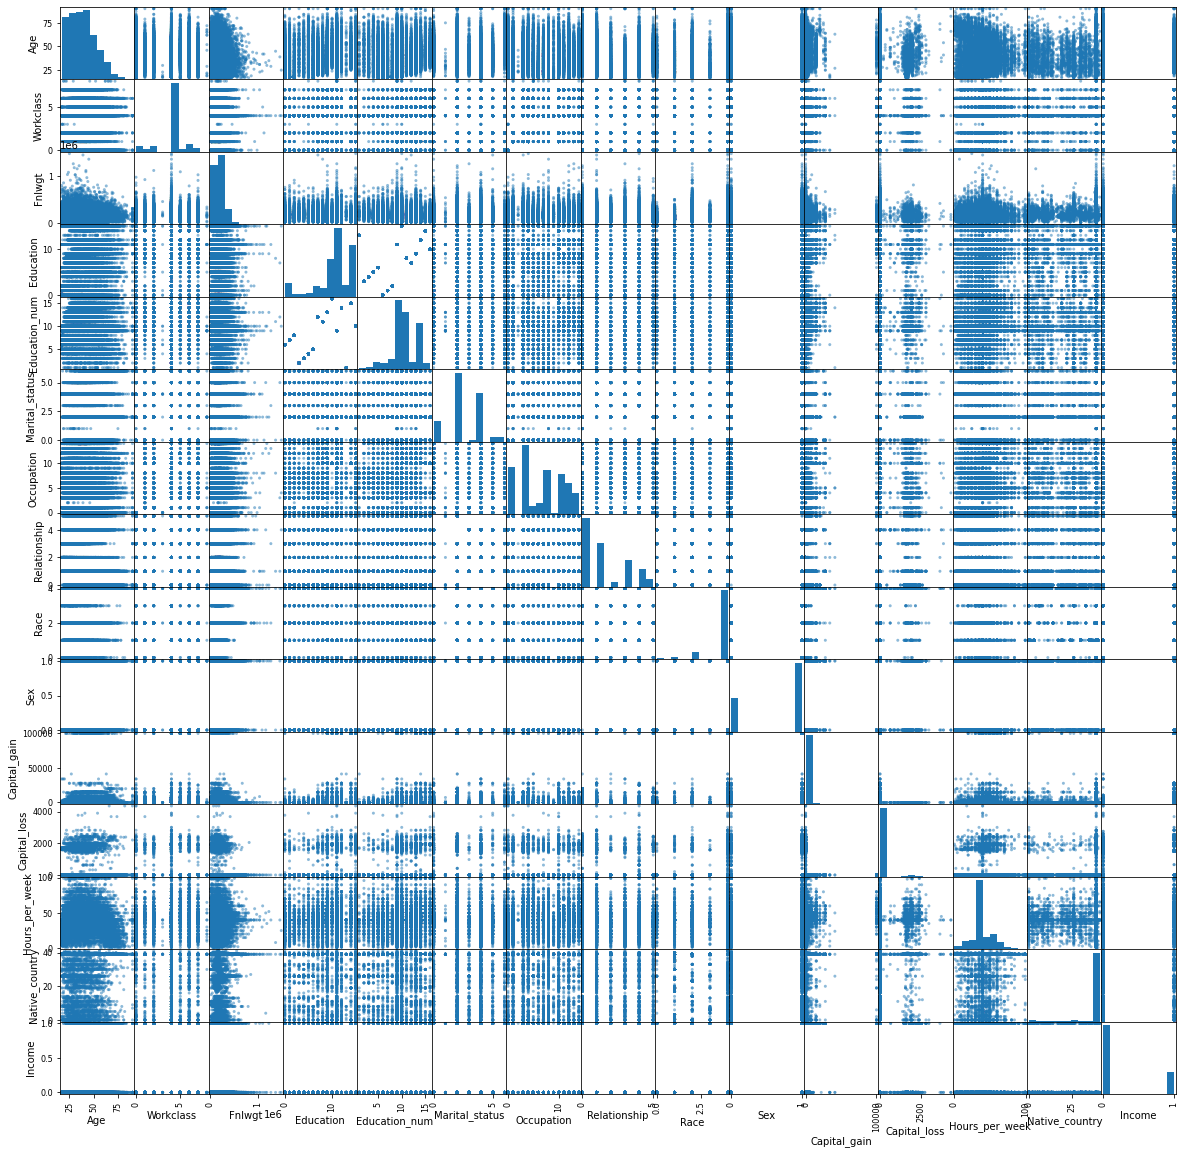

In [32]:
#chcking the impact of the columns on the taget variable 
pd.plotting.scatter_matrix(df,figsize=(20,20))

From all of the visualisations above, we've made some pretty interesting observations. Let's go through them one after the other. 

We have deduced that the average age for those earning more than 50k is greater than the average age for those earning less than 50k.This is simply botressing the fact that older people earn more.
The plot for work hours per week people who put more time into their work earn more than those who put little time only.
The visual for education is quite fascinating. 12 years of education seems to be starting point for high earnings as those who have 12 years or less are seen to earn less than 50k, however this changes when the education level exceeds 12 years.
From the graph of marital status, we see that married people earn more than unmarried folks.
For the race visuals, whites and asians earn more exponentially than blacks, american indian and other races.
Lastly, the gender, males tend to earn more than females. 
Ultimately, from what we understand from the visualisation, to earn over 50k, one has to have a masters degree, work tirelessly for hours,be a white, be a male and be married.


That will be all for the EDA. We will move on to building machine learning predictive models.

# Machine Learning Models

In [33]:
df.drop(['Fnlwgt'],axis=1,inplace=True)

In [34]:
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,11,9,4,1,3,4,1,0,0,20,39,0


In [35]:
#dividing the data into feature and target variable 
x=df.drop('Income',axis=1)
y=df['Income']

We have divided our data into features and target. We did this twice since we have two target variables . Next, we import the libraries needed to build the machine learning models.

In [36]:
#trainig the data 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression 

In [37]:
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is = {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is = {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is = 0.26083742826726
At random state 0,the testing accuracy is = 0.26535725089303464


At random state 1,the training accuracy is = 0.26240393930752226
At random state 1,the testing accuracy is = 0.25848597606412893


At random state 2,the training accuracy is = 0.263301297657482
At random state 2,the testing accuracy is = 0.2551384437437928


At random state 3,the training accuracy is = 0.26084868539492645
At random state 3,the testing accuracy is = 0.26507855912830114


At random state 4,the training accuracy is = 0.2629804618818363
At random state 4,the testing accuracy is = 0.2565193526759124


At random state 5,the training accuracy is = 0.2630362509636964
At random state 5,the testing accuracy is = 0.25569599742821714


At random state 6,the training accuracy is = 0.26289190204251955
At random state 6,the testing accuracy is = 0.25673288001352845


At random state 7,the training accuracy is = 0.26199075323401055
At random state 7,the testi

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=50)

In [39]:
pred_test=lr.predict(x_test)

In [40]:
pred_train=lr.predict(x_train)

In [41]:
print(r2_score(y_test,pred_test)*100)

26.313935869356307


In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [43]:
pred_test=lr.predict(x_test)
pred_test

array([0.33967738, 0.16864091, 0.21653784, ..., 0.60824753, 0.29353519,
       0.1148834 ])

In [44]:
pred_train=lr.predict(x_train)
pred_train

array([1.5653659 , 0.47644302, 0.21065587, ..., 0.08759382, 0.46320039,
       0.4747952 ])

In [45]:
lr_accuracy=round(lr.score(x_train,y_train)*100)
lr_accuracy

26

In [46]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=15, min_samples_leaf=2)
tree.fit(x_train,y_train)
tree_pred=tree.predict(x_test)
tree_pred

array([0.25806452, 0.        , 0.00719424, ..., 0.88020833, 0.        ,
       0.        ])

In [47]:
tree_accuracy=round(tree.score(x_train,y_train)*100)
tree_accuracy

62

In [48]:
from sklearn.ensemble import RandomForestRegressor 
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=2,n_jobs=4)
rf.fit(x_train,y_train)
rf.pred=rf.predict(x_test)

In [49]:
rf_accuracy=round(rf.score(x_train,y_train)*100)
rf_accuracy

46

In [50]:
import xgboost
from xgboost import XGBRegressor

model=XGBRegressor(n_estimators=100,learning_rate=0.05)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [51]:
y_pred=model.predict(x_test)
y_pred

array([0.30309385, 0.0137991 , 0.01310271, ..., 0.8844554 , 0.03937618,
       0.00686371], dtype=float32)

In [52]:
model.score(x_train,y_train)*100

53.573584226488016

In [53]:
model_accuracy=round(model.score(x_train,y_train)*100)
model_accuracy

54

After testing out four machine learning models, two of them gave accurate and satisfying results,to choose between these two, we will use the cross validation method to determine the final model.

In [54]:
#Cross validation  for desisiontree
scr=cross_val_score(tree,x,y,cv=5)
scr.mean()
print("Cross validation score of DecisionTreeRegression:",scr.mean())

Cross validation score of DecisionTreeRegression: 0.36911525961010944


In [55]:
#Cross validation  for xgboost
scr=cross_val_score(model,x,y,cv=5)
scr.mean()
print("Cross validation score of Xgboost:",scr.mean())

Cross validation score of Xgboost: 0.49913128616840313


In the end, we chose XGBoost Regressor. Now to regularise the data to avoid overfitting. We will be using GridsearchCV for the regularisation.

In [56]:
#regularising the data 
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=XGBRegressor()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [57]:
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [58]:
#final model training
ls=Lasso(alpha = 10, random_state= 0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

7.3361716873808

In [59]:
lss=r2_score(y_test,pred_ls)
lss*100

6.559342074638231

In [60]:
ls_accuracy=round(ls.score(x_train,y_train)*100)
ls_accuracy

7

Now, we will save the XGBoost model and create a dataset showing the predicted data and the original data.

In [61]:
#saving the model
import pickle 
filename='churn.pkl'
pickle.dump(model,open(filename,'wb'))

In [62]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)*100
result

50.06923887075787

In [63]:
#creatig a new df
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_train[:]],index=["Predicted","Original"])

In [64]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,26038,26039,26040,26041,26042,26043,26044,26045,26046,26047
Predicted,0.303094,0.013799,0.013103,0.006107,-0.006988,0.506575,0.389942,-0.001231,0.713434,0.457087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original,1.565366,0.476443,0.210656,-0.184095,0.408414,0.212661,0.356885,0.534904,0.359199,0.614343,...,0.328557,0.209525,0.383351,0.335764,0.413662,0.278059,0.214212,0.087594,0.4632,0.474795


With this, we have come to the end of Census Income Project. I have chosen my final model to be the XGBoost Regressor. This is because it has given a very accurate prediction and it has very little overfitting. Hence, its best for real life problems. Let's have a quick summary of what has been done. We downloaded all the necesary libraries, we imported the dataset, we transformed the data, we cleaned the data, and we began the EDA. 
After the EDA, we split the data and started training the data. For the training, four models were used . They are; Linear Regressor,Decision Tree Regressor, Random Forest Regressor, XGBoost Regressor. 
Decision Tree Regressor and XGBoost Regressors gave accurate results and to choose between the two, we had to cross validate.

Eventually, we chose XGBoost Regressor and then rgularised the data in the model to avoid overfitting. Afterwards, we saved the model and created a new dataframe showing the predicted and original data to show how accurate the predictive model is.